In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import re
import os

sns.set_context('talk')

# Data Cleaning

Cleaning selected data (TV shows with more than 70% episodes collected) and looking for corrupted transcripts to remove (outliers in boxplots)

In [1]:
%store -r df_nation
%store -r df_series_groups

In [3]:
# # df_nation.rename(columns={'levels':'1000-level'}, inplace=True)
# conditions_frequency = [(df_nation['levels'] <= 3),
#              (df_nation['levels'] == 4),
#              (df_nation['levels'] >= 5) & (df_nation['levels']<= 14)]
# values_frequency = ['1-3', '4', '5-14']
# df_nation['levels_frequency'] = np.select(conditions_frequency, values_frequency)

# conditions_coverage = [(df_nation['levels']<=14),
#                         (df_nation['levels']>=15) & (df_nation['levels']<=25),
#                       (df_nation['levels']>=26)]
# values_coverage = [df_nation['levels'], 15, df_nation['levels']]

# df_nation['levels_coverage'] = np.select(conditions_coverage, values_coverage)

In [7]:
# pickle transcripts
input_file = open('df_series_analysis','rb')
df_series_analysis = pickle.load(input_file)

In [14]:
####################################################################################
df_simpsons = df_simpsons[df_simpsons['series_titles']=='the simpsons']
df_simpsons.reset_index(drop=True, inplace=True)

from cleaning import clean_transcripts

round1 = lambda x: clean_transcripts(x)
df_simpsons['transcripts'] = df_simpsons['transcripts'].apply(round1)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse
cv = CountVectorizer()#only misleading words excluded for the analysis
cv_matrix = cv.fit_transform(df_simpsons['transcripts'])
df_dtm = pd.DataFrame.sparse.from_spmatrix(cv_matrix, index=df_simpsons.index,
                                           columns=cv.get_feature_names())

df_dtm = df_dtm.T

### Vocabulary coverage of the average Simpsons episode

In [17]:
frames = get_coverage(df_simpsons.index.values, df_dtm)

In [18]:
pd.concat(frames, axis=0, ignore_index=True)[[1, 2, 3, 4, 5, 26, 27, 100]].mean()

lvl
1.0      80.799750
2.0       4.958851
3.0       1.644374
4.0       1.303682
5.0       3.998807
26.0      3.690619
27.0      2.235950
100.0     1.367835
dtype: float64

In [27]:
index = 139 #episode number is different from index!!!
series_name = 'The Simpsons'
df_random_episode = get_coverage([index], df_dtm)[0]
df_random_episode.rename(columns={26:'Character names', 27:'Interjections', 
                                  100:series_name+" words"}, inplace=True)
df_random_episode.T.rename(columns={0:'count', 1:'%'})

,count,%
lvl,,
1.0,2054.0,80.33
2.0,118.0,4.61
3.0,25.0,0.98
4.0,27.0,1.06
5.0,126.0,4.93
Character names,116.0,4.54
Interjections,63.0,2.46
The Simpsons words,28.0,1.10


In [28]:
df_words_series = get_frames(df_simpsons.index.values, df_dtm)
df_words_series = df_words_series[['all_forms', 'count', 'levels_coverage']]
df_words_series = df_words_series[df_words_series['levels_coverage']==100]
df_words_series

,all_forms,count,levels_coverage
16,alphy,1,100.0
55,batmobile,1,100.0
90,bruprecht,1,100.0
108,caroling,1,100.0
110,carumba,1,100.0
...,...,...,...
549,rhames,1,100.0
553,riverdance,1,100.0
715,unhand,1,100.0
721,unsplit,1,100.0


In [32]:
df_words_series.sort_values('count', ascending=False)[:30]
####################################################################################

,all_forms,count,levels_coverage
77,bomp,108,100.0
348,jebediah,38,100.0
506,poochie,33,100.0
212,duffman,33,100.0
701,tappa,27,100.0
587,stampy,26,100.0
571,selma,25,100.0
818,zaius,24,100.0
408,michaeljackson,24,100.0
303,frink,21,100.0


In [11]:
# cleaning transcripts
from cleaning import clean_transcripts

round1 = lambda x: clean_transcripts(x)
df_series_analysis['transcripts'] = df_series_analysis['transcripts'].apply(round1)

In [ ]:
df_series_analysis['tokens'] = df_series_analysis['transcripts'].apply(lambda x:len(x.split()))

In [ ]:
#the difference between tokens_raw and tokens shouldn't be so much since only speaker's name,
#words within parentheses and squarebrackets were removed
print('Min Raw: ' + str(df_series_analysis['tokens_raw'].min()) + ', Min Clean: '+ str(df_series_analysis['tokens'].min()))
# #and only contractions were added "'n" --> 'not'
print('Max Raw: ' + str(df_series_analysis['tokens_raw'].max()) + ', Max Clean: '+ str(df_series_analysis['tokens'].max()))

Before working with the data we need to make sure there isn't any corrupted transcripts (transcripts with no or few dialogues or with duplicated dialogues)

In [ ]:
sns.boxplot(x=df_series_analysis['tokens'])

# Exploratory Data Analysis

### Document-Term Matrix

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse
cv = CountVectorizer()#only misleading words excluded for the analysis
cv_matrix = cv.fit_transform(df_series_analysis['transcripts'])
df_dtm = pd.DataFrame.sparse.from_spmatrix(cv_matrix, index=df_series_analysis.index,
                                           columns=cv.get_feature_names())

In [10]:
df_dtm = df_dtm.T

### Formulas

In [12]:
#behaviour
def get_frames(indices, dtm, thousand_level=None): #, thousand_level ['4'], ['5-14']
    """1. The df_dtm gives the number of times a word (all_forms) shows up in an episode/movie
       2. Then its joined to get the level and base_forms of each word
       3. The final df has the words counted for each episode so it can be seen base_forms repetition in the final df"""
    frames = []
    for index in indices:
        df_count_words = dtm[[index]].loc[dtm[index]!=0]
        df_count_words = df_count_words.reset_index()
        df_count_words.rename(columns={"index": "all_forms", index: "count"}, inplace=True)

        df_count_words_level = pd.merge(df_count_words, df_nation[['base_forms', 'all_forms',
                                'levels_frequency', 'levels', 'levels_coverage']], how='left', on='all_forms')
        df_count_words_level = df_count_words_level.dropna() ##INNER JOIN
        if thousand_level is not None:
            df_count_words_level = df_count_words_level[df_count_words_level['levels_frequency'].isin(thousand_level)]
        frames.append(df_count_words_level)
    df_count_words_level = pd.concat(frames)
    return df_count_words_level

def get_count(df_movie_nation):
    """Grouping by base_forms of word and summing their number of encounters
    Note: the 'count' column type in most cases is 'SPARSE NUMPY INT'. Then I have to use the 
    first 2 lines in the 'try' block to get 'int'. However, for some reason some columns after
    concatenating (in def get_frames)  are 'int'values. They go straigt to the 'except' block """
    try:
        int_value = [i.item() for i in df_movie_nation['count']]
        df_movie_nation['count'] = int_value
        df_count = df_movie_nation.groupby(by=['base_forms']).sum().reset_index()
        df_count = df_count.rename(columns={'count':'base_forms_encounters'})
        df_count = df_count.sort_values(by=['base_forms_encounters'], ascending=False)
    except:
        df_count = df_movie_nation.groupby(by=['base_forms']).sum().reset_index()
        df_count = df_count.rename(columns={'count':'base_forms_encounters'})
        df_count = df_count.sort_values(by=['base_forms_encounters'], ascending=False)
    return df_count

def get_statistics(df_movie_nation, df_count):
    """We merge and only get the root encounters to have a clean df when presenting data"""
    df_movie_nation.drop_duplicates(['base_forms'], inplace=True)
    df_movie_nation.drop(['all_forms','count'], axis=1, inplace=True)#Dropping columns from the df created in get_frames
    df_movie_nation = pd.merge(df_movie_nation, df_count, on='base_forms')[['base_forms_encounters']]

    conditions = [
    (df_movie_nation['base_forms_encounters'] == 1),
    (df_movie_nation['base_forms_encounters'] == 2),
    (df_movie_nation['base_forms_encounters'] >= 3) & (df_movie_nation['base_forms_encounters'] <= 4),
    (df_movie_nation['base_forms_encounters'] >= 5) & (df_movie_nation['base_forms_encounters'] <= 7),
    (df_movie_nation['base_forms_encounters'] >= 8) & (df_movie_nation['base_forms_encounters'] <= 9),
    (df_movie_nation['base_forms_encounters'] >= 10)
    ]
    values = ['1', '2', '3-4', '5-7', '8-9', '10+'] ###
    df_movie_nation['range_encounters'] = np.select(conditions, values)
    
    df_statistics = df_movie_nation.groupby('range_encounters').count()
    total = np.sum(df_statistics['base_forms_encounters'])
    #### APPLYING ON ROOT_encounter (shouldn't be no blanks in that column)
    df_statistics['%'] = df_statistics['base_forms_encounters'].apply(lambda x: round((int(x)/int(total))*100))
    df_statistics.sort_values(by=['%'], ascending=False)
    
    df_total_word_families = pd.DataFrame(df_statistics.sum()).T.rename(index={0:'Total word families'})
    df_statistics = df_statistics.append(df_total_word_families)
    df_tokens = pd.DataFrame(df_movie_nation[['base_forms_encounters']].sum(), columns=['base_forms_encounters'])
    df_tokens.rename(index={'base_forms_encounters':'Tokens'}, inplace=True)
    df_statistics = df_statistics.append(df_tokens)
    df_statistics = df_statistics.fillna(0)
    return df_statistics

def get_average(frames):
    average = sum(frames)/len(frames)
    average.sort_values(by=['%'], ascending=False, inplace=True)
    average = average.round(decimals=2)
    return average

In [13]:
###

def get_frames(indices, dtm, thousand_level=None): #, thousand_level ['4'], ['5-14']
    """1. The df_dtm gives the number of times a word (all_forms) shows up in an episode/movie
       2. Then its joined to get the level and base_forms of each word
       3. The final df has the words counted for each episode so it can be seen base_forms repetition in the final df"""
    frames = []
    for index in indices:
        df_count_words = dtm[[index]].loc[dtm[index]!=0]
        df_count_words = df_count_words.reset_index()
        df_count_words.rename(columns={"index": "all_forms", index: "count"}, inplace=True)

        df_count_words_level = pd.merge(df_count_words, df_nation[['base_forms', 'all_forms',
                                'levels_frequency', 'levels', 'levels_coverage']], how='left', on='all_forms', indicator=True)
        df_count_words_level.loc[df_count_words_level['_merge']=='left_only', 'levels_coverage'] = 100
        if thousand_level is not None: #only consider words in specific levels
            df_count_words_level = df_count_words_level[df_count_words_level['levels_frequency'].isin(thousand_level)]
        frames.append(df_count_words_level)
    df_count_words_level = pd.concat(frames)
    return df_count_words_level

def get_coverage(indices, df_dtm):
    frames = []
    for episode_index in indices:
        df_coverage_episode = get_frames([episode_index], df_dtm) ##
        df_coverage_episode = df_coverage_episode[['count' ,'levels_coverage']].groupby('levels_coverage').sum()
        df_coverage_episode.drop([28, 29], axis=0, inplace=True, errors='ignore')
        df_coverage_episode['%'] = 100 * (round(df_coverage_episode['count']/
                                            df_coverage_episode['count'].sum(), 4))
        df_coverage_episode = df_coverage_episode.reset_index()
        condition = [(df_coverage_episode['levels_coverage']<=4),
            (df_coverage_episode['levels_coverage']>=5) & (df_coverage_episode['levels_coverage']<=15),
                    (df_coverage_episode['levels_coverage']>=26)] #15 includes list from 15 to 25
        values = [df_coverage_episode['levels_coverage'], 5, df_coverage_episode['levels_coverage']]
        df_coverage_episode['lvl'] = np.select(condition, values)
        df_coverage_episode = df_coverage_episode.groupby('lvl').sum()
        df_coverage_episode['cumulative'] = df_coverage_episode['%'].cumsum()
        if len(indices)==1:   
            df_coverage_episode = df_coverage_episode[['count', '%']].T.reset_index(drop=True)
        elif len(indices)>1:
            df_coverage_episode = df_coverage_episode[['%']].T.reset_index(drop=True)
            df_coverage_episode['index'] = episode_index
        frames.append(df_coverage_episode)
    return frames

# Processing Data

By running the following code, we obtain how the number of repetition of words in lvl 4 and lvl5+ throughtout all episodes of a Tv show. The code takes more than 30min to run (process most episodes of 83 tv shows) Just pickle

In [ ]:
# groups = ['group1', 'group2', 'group3', 'group4']
# levels = ['4', '5-14']

# dict_series_encounters = {}
# dict_series_encounters_averages = {}
# for level in levels:
#     for group in groups:
#         list_series_id = list(df_series_groups[df_series_groups['groups']==group]['tconst'].values)
#         frames_group = []
#         all_series_id = []
#         for series_id in list_series_id:
#             episodes_id = df_series_analysis[df_series_analysis['tconst']==series_id].index.values
#             df_coverage_series = get_frames(episodes_id, df_dtm ,[level]) #4, 5-14, 1-3
#             df_count_recommended_transcripts = get_count(df_coverage_series)
#             df_statistics_recommended_transcripts = get_statistics(df_coverage_series, 
#                                                                    df_count_recommended_transcripts)
# #         #     print('----' + serie + '-----')
# #         #     print('Total: ' + str(np.sum(df_statistics_recommended_transcripts['root_encounter'])))
# #         #     print(df_statistics_recommended_transcripts)
#             all_series_id.append(series_id)
#             frames_group.append(df_statistics_recommended_transcripts)       
#         name_level = level.split('-')
#         name_level = '_'.join(name_level)
#         dict_series_encounters['dict_%s_lvl%s' % (group, name_level)] = dict(zip(all_series_id, frames_group))
#         dict_series_encounters_averages['average_%s_lvl%s' % (group, name_level)] = get_average(frames_group)

In [35]:
#download
dict_series_encounters = pickle.load(open('dict_series_encounters', 'rb'))

In [36]:
dict_series_encounters_averages = {}
dict_series_encounters_averages = {'average_' + (key.split('_')[1]+ '_' +key.split('_')[2]): get_average(dict_series_encounters[key].values()) for key in dict_series_encounters}

### Grouping by TV shows genre

In [37]:
#GER RID OF BRACKETS
# df_series_comparative['genres'] = df_series_comparative['genres'].str[0]
df_family = df_series_groups[df_series_groups['genres'].str.contains('Family|Documentary|Reality-TV')]
df_non_family = df_series_groups[~df_series_groups['genres'].str.contains('Family|Documentary|Reality-TV')]
df_fantasy = df_non_family[df_non_family['genres'].str.contains('Fantasy|Horror|Sci-Fi')]
df_non_family_fantasy = df_non_family[~df_non_family['genres'].str.contains('Fantasy|Horror|Sci-Fi')]
df_comedy = df_non_family_fantasy[df_non_family_fantasy['genres'].str.contains('Comedy')]
df_non_family_fantasy_comedy = df_non_family_fantasy[~df_non_family_fantasy['genres'].str.contains('Comedy')]
df_drama = df_non_family_fantasy_comedy[df_non_family_fantasy_comedy['genres'].str.contains('Drama|Crime|Mystery|Action|Adventure|Western')]

In [38]:
dict_encounters_series_levels = {
    'lvl4': [dict_series_encounters[name] for name in dict_series_encounters if name.split('_')[2] == 'lvl4'] ,
    'lvl5': [dict_series_encounters[name] for name in dict_series_encounters if name.split('_')[2] == 'lvl5'] ,
}

dict_encounters_genre = {'lvl4':{
    'drama':[lists[series_id].rename_axis(series_id) for lists in dict_encounters_series_levels['lvl4'] for series_id in lists if series_id in df_drama['tconst'].values],
    'fantasy':[lists[series_id].rename_axis(series_id) for lists in dict_encounters_series_levels['lvl4'] for series_id in lists if series_id in df_fantasy['tconst'].values],
    'comedy':[lists[series_id].rename_axis(series_id) for lists in dict_encounters_series_levels['lvl4'] for series_id in lists if series_id in df_comedy['tconst'].values],
    'family':[lists[series_id].rename_axis(series_id) for lists in dict_encounters_series_levels['lvl4'] for series_id in lists if series_id in df_family['tconst'].values],
}, 
                         'lvl5':{
    'drama':[lists[series_id].rename_axis(series_id) for lists in dict_encounters_series_levels['lvl5'] for series_id in lists if series_id in df_drama['tconst'].values],
    'fantasy':[lists[series_id].rename_axis(series_id) for lists in dict_encounters_series_levels['lvl5'] for series_id in lists if series_id in df_fantasy['tconst'].values],
    'comedy':[lists[series_id].rename_axis(series_id) for lists in dict_encounters_series_levels['lvl5'] for series_id in lists if series_id in df_comedy['tconst'].values],
    'family':[lists[series_id].rename_axis(series_id) for lists in dict_encounters_series_levels['lvl5'] for series_id in lists if series_id in df_family['tconst'].values],
}}

In [39]:
#Tokens genre

series_id_drama = pd.DataFrame([series_id.index.name for series_id in dict_encounters_genre['lvl4']['drama']], columns=['tconst'])
series_id_drama['paper_genre'] = 'Drama'
series_id_fantasy = pd.DataFrame([series_id.index.name for series_id in dict_encounters_genre['lvl4']['fantasy']], columns=['tconst'])
series_id_fantasy['paper_genre'] = 'Fantasy'
series_id_comedy = pd.DataFrame([series_id.index.name for series_id in dict_encounters_genre['lvl4']['comedy']], columns=['tconst'])
series_id_comedy['paper_genre'] = 'Comedy'
series_id_family = pd.DataFrame([series_id.index.name for series_id in dict_encounters_genre['lvl4']['family']], columns=['tconst'])
series_id_family['paper_genre'] = 'Family'

df_series_id_genres = pd.concat([
    series_id_drama, series_id_fantasy, series_id_comedy, series_id_family
], axis=0)

df_series_groups = pd.merge(df_series_groups, df_series_id_genres, on=['tconst'])

In [41]:
dict_series_10encounters = {'lvl4': {
    'tconst':[df.index.name for lvl in dict_encounters_genre if lvl == 'lvl4' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]], 
    '10+':[df.at['10+','base_forms_encounters'] for lvl in dict_encounters_genre if lvl == 'lvl4' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]],
    '%':[df.at['10+','%'] for lvl in dict_encounters_genre if lvl == 'lvl4' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]], 
    'word_familes':[df.at['Total word families','base_forms_encounters'] for lvl in dict_encounters_genre if lvl == 'lvl4' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]],
    'tokens':[df.at['Tokens','base_forms_encounters'] for lvl in dict_encounters_genre if lvl == 'lvl4' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]]
},
                            'lvl5': {
    'tconst':[df.index.name for lvl in dict_encounters_genre if lvl == 'lvl5' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]], 
    '10+':[df.at['10+','base_forms_encounters'] for lvl in dict_encounters_genre if lvl == 'lvl5' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]],
    '%':[df.at['10+','%'] for lvl in dict_encounters_genre if lvl == 'lvl5' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]], 
    'word_familes':[df.at['Total word families','base_forms_encounters'] for lvl in dict_encounters_genre if lvl == 'lvl5' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]],
    'tokens':[df.at['Tokens','base_forms_encounters'] for lvl in dict_encounters_genre if lvl == 'lvl5' for genre in dict_encounters_genre[lvl] for df in dict_encounters_genre[lvl][genre]]
}
                           }
df_series_10encounters = {'lvl4':pd.DataFrame.from_dict(dict_series_10encounters['lvl4']),
                          'lvl5':pd.DataFrame.from_dict(dict_series_10encounters['lvl5']),
                         }
#ADD THE GENRE YOU CREATED
df_plot_lvl4 = pd.merge(df_series_groups, df_series_10encounters['lvl4'], on='tconst')[['series_titles', 'runtimeMinutes', 'series_runtime', 'groups','paper_genre',
                                                                       '10+', '%', 'word_familes', 'tokens']].sort_values(by=['10+', '%'], ascending=False)
df_plot_lvl4['lvl'] = 'lvl 4'
df_plot_lvl5 = pd.merge(df_series_groups, df_series_10encounters['lvl5'], on='tconst')[['series_titles', 'runtimeMinutes', 'series_runtime', 'groups','paper_genre',
                                                                       '10+', '%', 'word_familes', 'tokens']].sort_values(by=['10+', '%'], ascending=False)

df_plot_lvl5['lvl'] = 'lvl 5-14'
df_plot = pd.concat([df_plot_lvl4, df_plot_lvl5], axis=0)

# ScatterPlot

Plotting 83 TV shows, though the data splitted of The Simpsons (S1-16 + S16-32) and Game of Thrones is calculated later

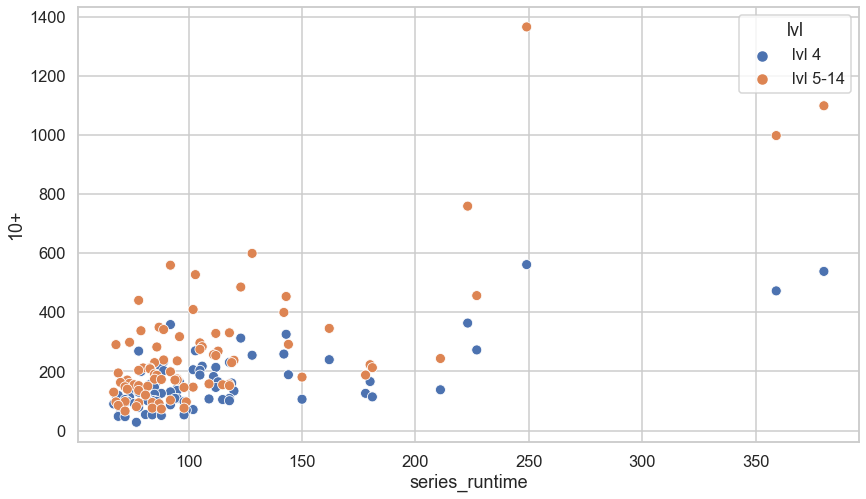

In [201]:
#Static plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.scatterplot(x='series_runtime', y='10+', data=df_plot,
             hue='lvl', s=100, ax=ax, palette="deep")

#Dynamic
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode()

# fig = go.Figure()
# for genre, df_genre in df_plot.groupby('paper_genre'):
#     fig.add_scatter(x=df_genre["series_runtime"], y=df_genre["10+"], text=df_genre['series_titles'],
#     name=genre, mode='markers')
# iplot(fig)

# The Simpsons

In [43]:
df_simpsons = df_series_analysis[df_series_analysis['tconst']=='tt0096697']
df_simpsons_index = df_simpsons.index.values

df_simpsons_vocabulary_lvl4 = get_frames(df_simpsons_index, df_dtm, ['4'])
df_simpsons_vocabulary_lvl5 = get_frames(df_simpsons_index, df_dtm, ['5-14'])

### Preparing data for wordcloud

In [44]:
df_simpsons_vocabulary_lvl4_base_forms = get_count(df_simpsons_vocabulary_lvl4)
df_simpsons_vocabulary_lvl5_base_forms = get_count(df_simpsons_vocabulary_lvl5)

df_simpsons_vocabulary_lvl4_base_forms['base_forms'] = df_simpsons_vocabulary_lvl4_base_forms['base_forms'].apply(lambda x: x+' ')
df_simpsons_vocabulary_lvl4_base_forms['wordcloud'] = df_simpsons_vocabulary_lvl4_base_forms['base_forms'] * df_simpsons_vocabulary_lvl4_base_forms['base_forms_encounters']

df_simpsons_vocabulary_lvl5_base_forms['base_forms'] = df_simpsons_vocabulary_lvl5_base_forms['base_forms'].apply(lambda x: x+' ')
df_simpsons_vocabulary_lvl5_base_forms['wordcloud'] = df_simpsons_vocabulary_lvl5_base_forms['base_forms'] * df_simpsons_vocabulary_lvl5_base_forms['base_forms_encounters']

df_simpsons_vocabulary_lvl4_base_forms = df_simpsons_vocabulary_lvl4_base_forms[df_simpsons_vocabulary_lvl4_base_forms[
    'base_forms_encounters']>=10]
df_simpsons_vocabulary_lvl5_base_forms = df_simpsons_vocabulary_lvl5_base_forms[df_simpsons_vocabulary_lvl5_base_forms[
    'base_forms_encounters']>=10]

#dropping extra interjections
df_simpsons_vocabulary_lvl4_base_forms.drop(64, axis=0, inplace=True) #aye
df_simpsons_vocabulary_lvl5_base_forms.drop([6401, 6488], axis=0, inplace=True) #whoa, yoo

In [45]:
df_wordcloud = pd.concat([df_simpsons_vocabulary_lvl4_base_forms, df_simpsons_vocabulary_lvl5_base_forms])
df_wordcloud = df_wordcloud.sort_values('base_forms_encounters', ascending=False)
df_wordcloud_1 = df_wordcloud[:642]
df_wordcloud_2 = df_wordcloud[642:1284]
df_wordcloud_3 = df_wordcloud[1284:]

In [46]:
text_simpsons_1 = ''.join(df_wordcloud_1['wordcloud'].values)
text_simpsons_2 = ''.join(df_wordcloud_2['wordcloud'].values)
text_simpsons_3 = ''.join(df_wordcloud_3['wordcloud'].values)

# Wordcloud

In [47]:
import stylecloud
stylecloud.gen_stylecloud(text_simpsons_1, collocations=False, palette="cartocolors.diverging.TealRose_7", 
                          background_color="white", icon_name= 'fas fa-couch',
                         colors=['#A8890B', '#ff0000', '#e74c3c'])

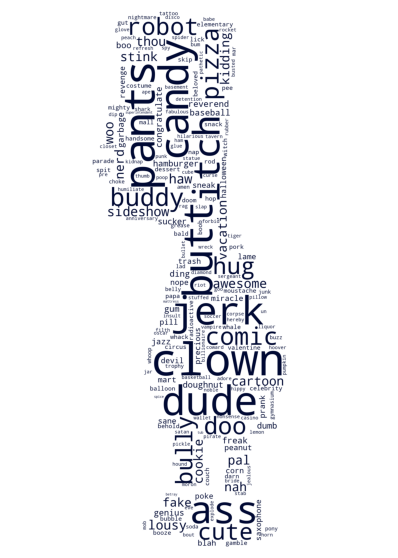

In [48]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
shape = np.array(Image.open('pic1.png'))
wc = WordCloud(background_color = 'white', mask=shape, collocations=False, width=600, height=300)
wc.generate(text_simpsons_1)


def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(10,11))

image_colors = ImageColorGenerator(shape)
wc.recolor(color_func=grey_color_func)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file("cloud1.png")

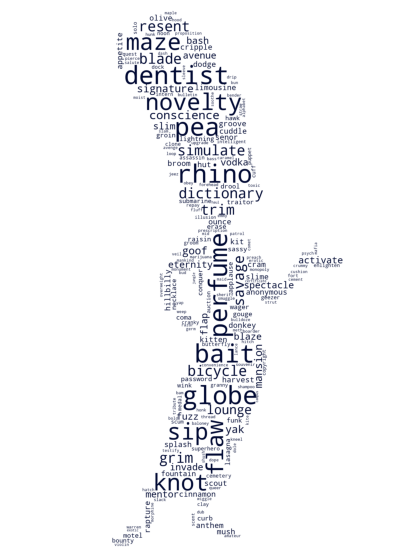

In [49]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
shape = np.array(Image.open('pic2.png'))
wc = WordCloud(background_color = 'white', mask=shape, collocations=False, width=600, height=300)
wc.generate(text_simpsons_2)


def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(10,11))

image_colors = ImageColorGenerator(shape)
wc.recolor(color_func=grey_color_func)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file("cloud2.png")

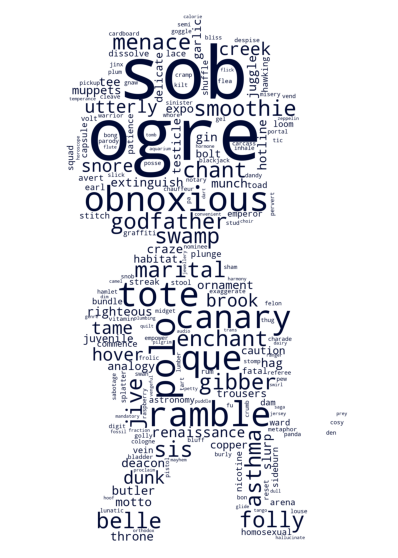

In [50]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
shape = np.array(Image.open('pic3.png'))
wc = WordCloud(background_color = 'white', mask=shape, collocations=False, width=600, height=300)
wc.generate(text_simpsons_3)


def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(10,11))

image_colors = ImageColorGenerator(shape)
wc.recolor(color_func=grey_color_func)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file("cloud3.png")

# Simpsons Seasons Analysis

In [51]:
#The Simpsons Seasons 1-16
set1 = np.arange(1, 17)
#The Simpsons Seasons 17-32
set2 = np.arange(17, 33)
sets = [set1, set2]

In [52]:
dict_simpsons_lvl4 = {}
dict_simpsons_lvl5 = {}
for i in sets:
    df_season = df_simpsons[df_simpsons['seasons'].isin(i)]
    df_season_index = df_season.index.values

    df_vocabulary_lvl4 = get_frames(df_season_index, df_dtm, ['4'])
    df_vocabulary_lvl4_base_forms = get_count(df_vocabulary_lvl4)
    statistic_lvl4 = get_statistics(df_vocabulary_lvl4, df_vocabulary_lvl4_base_forms)

    df_vocabulary_lvl5 = get_frames(df_season_index, df_dtm, ['5-14'])
    df_vocabulary_lvl5_base_forms = get_count(df_vocabulary_lvl5)
    statistic_lvl5 = get_statistics(df_vocabulary_lvl5, df_vocabulary_lvl5_base_forms)

    dict_simpsons_lvl4['statistic_set%s' % (i[0])] = statistic_lvl4
    dict_simpsons_lvl5['statistic_set%s' % (i[0])] = statistic_lvl5

### Vocabulary coverage of a single episode

In [53]:
df_episode_simpsons = get_frames([12011], df_dtm)[['count' ,'levels_coverage']].groupby('levels_coverage').sum()
df_episode_simpsons.drop([28, 29], inplace=True)
df_episode_simpsons = df_episode_simpsons.reset_index()
conditions = [df_episode_simpsons['levels_coverage']<5,
             (df_episode_simpsons['levels_coverage']>=5) & (df_episode_simpsons['levels_coverage']<=15),
             df_episode_simpsons['levels_coverage']==26,
             df_episode_simpsons['levels_coverage']==27]

values = [df_episode_simpsons['levels_coverage'], '5+', 'Character names', 'Interjections']
df_episode_simpsons['coverage'] = np.select(conditions, values)
df_episode_simpsons = df_episode_simpsons.groupby('coverage').sum()
df_episode_simpsons = df_episode_simpsons.reset_index()[['coverage', 'count']]
df_episode_simpsons['%'] = 100 * round(df_episode_simpsons['count'] /  df_episode_simpsons['count'].sum(), 3)
df_episode_simpsons

,coverage,count,%
0,1.0,2054.0,81.2
1,2.0,118.0,4.7
2,3.0,25.0,1.0
3,4.0,27.0,1.1
4,5+,126.0,5.0
5,Character names,116.0,4.6
6,Interjections,63.0,2.5


In [54]:
for i in df_episode_simpsons.values:
    print(i[0].split('.')[0] + ' | ' + f'{i[1]:,.0f}' + ' | ' +f'{i[2]:,.1f}')

1 | 2,054 | 81.2
2 | 118 | 4.7
3 | 25 | 1.0
4 | 27 | 1.1
5+ | 126 | 5.0
Character names | 116 | 4.6
Interjections | 63 | 2.5


### Coverage of 679 episodes

In [55]:
frames = []
for episode in df_simpsons_index:
    df_coverage_episode = get_frames([episode], df_dtm) ##
    df_coverage_episode = df_coverage_episode[['count' ,'levels_coverage']].groupby('levels_coverage').sum()
    df_coverage_episode.drop([28, 29], axis=0, inplace=True, errors='ignore')
    df_coverage_episode['%'] = 100 * (round(df_coverage_episode['count']/
                                        df_coverage_episode['count'].sum(), 4))
    df_coverage_episode = df_coverage_episode.reset_index()
    condition = [(df_coverage_episode['levels_coverage']<=4),
        (df_coverage_episode['levels_coverage']>=5) & (df_coverage_episode['levels_coverage']<=15),
                (df_coverage_episode['levels_coverage']>=26)]
    values = [df_coverage_episode['levels_coverage'], 5, df_coverage_episode['levels_coverage']]
    df_coverage_episode['lvl'] = np.select(condition, values)
    df_coverage_episode = df_coverage_episode.groupby('lvl').sum()
    df_coverage_episode['cumulative'] = df_coverage_episode['%'].cumsum()
    df_coverage_episode = df_coverage_episode[['%']].T.reset_index(drop=True)
    df_coverage_episode['index'] = episode
    frames.append(df_coverage_episode)

In [196]:
df_statistics = pd.concat(frames, axis=0, ignore_index=True)[['index', 1, 2, 3, 4, 5, 26, 27]]
df_statistics['Lvl 1'] = df_statistics[1] + df_statistics[26] + df_statistics[27]
df_statistics['Lvl 1+2'] = df_statistics['Lvl 1'] + df_statistics[2]
df_statistics['Lvl 1+2+3'] = df_statistics['Lvl 1+2'] + df_statistics[3]
df_statistics = pd.concat((df_statistics.set_index('index'), df_simpsons[['season_episode_names', 'seasons']]), axis=1)
df_statistics
# for i in df_statistics[['Lvl 1', 'Lvl 1+2', 'Lvl 1+2+3', 'season_episode_names', 'seasons']].values:
#     print(i[3]+' | '+ 'Season '+str(i[4]) +' | '+ f'{i[0]:.1f}')

,1.0,2.0,3.0,4.0,5.0,26.0,27.0,Lvl 1,Lvl 1+2,Lvl 1+2+3,season_episode_names,seasons
11872,73.53,3.71,1.07,1.27,3.38,13.32,3.71,90.56,94.27,95.34,S1E1: Simpsons Roasting on an Open Fire,1
11873,78.69,4.34,2.62,1.91,3.52,6.29,2.62,87.60,91.94,94.56,S1E2: Bart the Genius,1
11874,82.71,4.43,2.17,0.89,3.09,4.57,2.13,89.41,93.84,96.01,S1E3: Homer's Odyssey,1
11875,83.91,5.23,1.30,0.75,3.65,2.99,2.16,89.06,94.29,95.59,S1E4: There's No Disgrace Like Home,1
11876,82.85,4.16,1.29,1.25,2.89,3.79,3.75,90.39,94.55,95.84,S1E5: Bart the General,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12546,84.18,4.07,1.57,1.21,4.60,2.74,1.65,88.57,92.64,94.21,S31E19: Warrin' Priests (Part 1),31
12547,82.99,4.47,1.86,1.28,4.61,3.19,1.59,87.77,92.24,94.10,S31E20: Warrin' Priests (Part 2),31
12548,83.86,4.38,1.87,1.03,4.08,2.56,2.21,88.63,93.01,94.88,S31E21: The Hateful Eight-Year-Olds,31
12549,85.07,3.28,1.45,1.50,2.77,1.68,4.26,91.01,94.29,95.74,S31E22: The Way of the Dog,31


In [198]:
frames_2 = []
for episode in df_simpsons_index:
    df_4 = get_frames([episode], df_dtm, ['4']) ##
    df_5 = get_frames([episode], df_dtm, ['5-14']) ##
    df_vocabulary_episode = pd.concat([df_4, df_5])
    df_vocabulary_episode['index'] = episode
    frames_2.append(df_vocabulary_episode)

### What hard words are they saying across the 679 episodes?

In [199]:
# df_simpsons[df_simpsons['season_episode_names'].str.contains('S5E22')]
# df_vocabulary_episode.sort_values(by='count', ascending=False)[:50]
#11974
df_simpsons_lvl4_5 = pd.concat(frames_2)
df_simpsons_lvl4_5 = pd.merge(df_simpsons_lvl4_5, df_simpsons[['season_episode_names']].reset_index(), on='index')
df_simpsons_lvl4_5
# for i in df_simpsons_lvl4_5.values:
#     print(i[0]+', '+str(i[1])+', '+i[2]+', '+i[3]+', '+i[7])

,all_forms,count,base_forms,levels_frequency,levels,levels_coverage,index,season_episode_names
0,aboard,1,aboard,4,4.0,4.0,11872,S1E1: Simpsons Roasting on an Open Fire
1,aye,1,aye,4,4.0,4.0,11872,S1E1: Simpsons Roasting on an Open Fire
2,barn,1,barn,4,4.0,4.0,11872,S1E1: Simpsons Roasting on an Open Fire
3,beard,2,beard,4,4.0,4.0,11872,S1E1: Simpsons Roasting on an Open Fire
4,betrayed,1,betray,4,4.0,4.0,11872,S1E1: Simpsons Roasting on an Open Fire
...,...,...,...,...,...,...,...,...
58529,undercover,2,undercover,5-14,7.0,7.0,12550,S32E1: Undercover Burns
58530,undercurrent,1,undercurrent,5-14,10.0,10.0,12550,S32E1: Undercover Burns
58531,whoa,3,whoa,5-14,9.0,9.0,12550,S32E1: Undercover Burns
58532,withered,1,wither,5-14,6.0,6.0,12550,S32E1: Undercover Burns


### Top 10 easiest episodes

In [192]:
for i in df_statistics.sort_values(['Lvl 1'], ascending=False)[:10].values:
    print(i[10])

S5E22: Secrets of a Successful Marriage
S9E7: The Two Mrs. Nahasapeemapetilons
S1E6: Moaning Lisa
S15E20: The Way We Weren't
S22E5: Lisa Simpson, This Isn't Your Life
S8E19: Grade School Confidential
S5E12: Bart Gets Famous
S9E16: Dumbbell Indemnity
S1E9: Life on the Fast Lane
S4E14: Brother From the Same Planet


### Preparing Data for ScatterPlot of all episodes

In [68]:
df_1 = df_statistics[['Lvl 1', 'season_episode_names']]
df_1 = df_1.assign(label = 'Lvl 1')
df_1.rename(columns={'Lvl 1':'lvl'}, inplace=True)
df_2 = df_statistics[['Lvl 1+2', 'season_episode_names']]
df_2 = df_2.assign(label = 'Lvl 1+2')
df_2.rename(columns={'Lvl 1+2':'lvl'}, inplace=True)
df_3 = df_statistics[['Lvl 1+2+3', 'season_episode_names']]
df_3 = df_3.assign(label = 'Lvl 1+2+3')
df_3.rename(columns={'Lvl 1+2+3':'lvl'}, inplace=True)
df_dot = pd.concat([df_1, df_2, df_3])
df_dot['lvl'] = df_dot['lvl'].apply(lambda x:round(x,1))

In [69]:
movie_count = []

for index, percentage in enumerate(df_dot['lvl']):
    subset = df_dot.iloc[:index+1]    # Create subset starting at the beginning of dataset until the movie
    count = len(subset[subset['lvl'] == percentage])   # Count all movies from the same year in this subset
    movie_count.append(count) 

In [70]:
df_dot['count'] = movie_count

In [195]:
#Plot coverage on Episodes
# for i in df_dot.values:
#     print(i[1] + ' | ' + i[2] + ' | ' + str(i[3]) + ' | ' + str(i[0]))

# ScatterPlot of all episodes

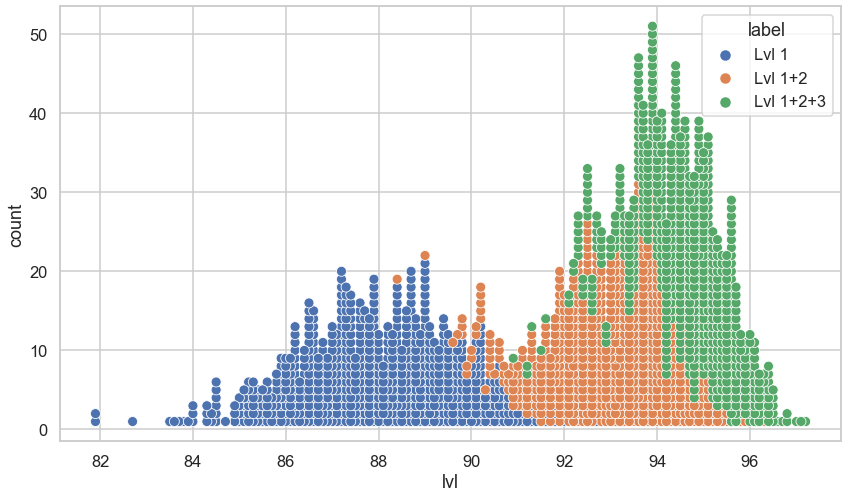

In [206]:
#Static plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.scatterplot(x='lvl', y='count', data=df_dot,
             hue='label', s=100, ax=ax, palette="deep")

#Dynamic plot
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode()

# fig = go.Figure()
# for genre, df_genre in df_dot.groupby('label'):
#     fig.add_scatter(x=df_genre["lvl"], y=df_genre['count'], text=df_genre['season_episode_names'],
#     name=genre, mode='markers')
# iplot(fig)
#The most difficult episode: S21E7

In [ ]:
# Data for the plot
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=False)

fig = go.Figure(go.Scatter(x=df_dot['lvl'], y=movie_count,
                 text=df_dot['lvl'], mode='markers')) 
fig.update_xaxes(title_text='Runtime', type='log')
fig.update_yaxes(title_text='10+')
# fig.update_layout(xaxis=dict([10,20]))

### Adding Game of Thrones transcript

In [153]:
# downloading series script
input_file = open('df_got','rb')
df_got = pickle.load(input_file)

df_got.rename(columns={'tokens':'tokens_raw'}, inplace=True)

In [155]:
from cleaning import clean_transcripts

round1 = lambda x: clean_transcripts(x)
df_got['transcripts'] = df_got['transcripts'].apply(round1)
df_got = df_got.assign(tokens = df_got['transcripts'].apply(lambda x:len(x.split())))

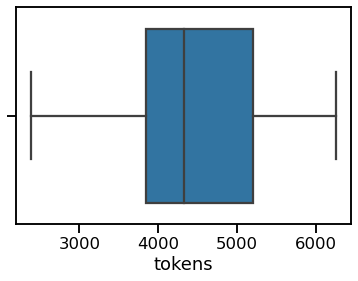

In [156]:
sns.boxplot(x=df_got['tokens'])

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse
cv_2 = CountVectorizer()#only misleading words excluded for the analysis
cv_matrix_2 = cv_2.fit_transform(df_got['transcripts'])
df_dtm_got = pd.DataFrame.sparse.from_spmatrix(cv_matrix_2, index=df_got.index,
                                           columns=cv_2.get_feature_names())

In [159]:
df_dtm_got = df_dtm_got.T

In [193]:
df_vocabulary_got = get_frames(df_got.index.values, df_dtm_got, ['4'])
df_count_got = get_count(df_vocabulary_got)
df_statistics_got = get_statistics(df_vocabulary_got, df_count_got) 

### Word repetition

In [194]:
df_statistics_got

,base_forms_encounters,%
1,144,33.0
10+,75,17.0
2,81,19.0
3-4,72,17.0
5-7,34,8.0
8-9,25,6.0
Total word families,431,100.0
Tokens,3225,0.0
